In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf 

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from pathlib import Path

In [ ]:
directory = Path('/content/drive/MyDrive/CLASSIFICATION SHOE/ut-zap50k-images/ut-zap50k-images')
file_path = list(directory.glob(r'**/**/**/**/**/**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [ ]:
file_path = pd.Series(file_path,name='File_path').astype(str)
labels = pd.Series(labels,name='Labels').astype(str)

img_df = pd.merge(file_path, labels, right_index=True, left_index=True)
img_df.head()

In [ ]:
img_df = pd.read_csv('/content/drive/MyDrive/CLASSIFICATION SHOE/img_df.csv')

In [ ]:
def preprocess(x):
    x = list(x)
    result = []
    for i in x:
        if i == '/':
            break
        else:
            result.append(i)
    return ''.join(result)        

In [ ]:
fp = file_path.str.split(pat="/", n = 8, expand = True)

label1 = fp[7]+" - "+fp[8]
label1 = pd.DataFrame(label1)
label1 = label1.rename(columns = {0:'label1'})

img_df2 = pd.concat([img_df, label1], axis=1)
img_df2 = img_df2.drop('Labels', axis=1)
img_df2.label1 = img_df2.label1.apply(preprocess)
img_df2

In [ ]:
img_df2 = pd.read_csv('/content/drive/MyDrive/CLASSIFICATION SHOE/img_df2.csv')

In [ ]:
img_df2

,File_path,label1
0,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Boots - Ankle
1,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Boots - Ankle
2,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Boots - Ankle
3,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Boots - Ankle
4,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Boots - Ankle
...,...,...
50020,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Sandals - Heel
50021,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Sandals - Heel
50022,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Sandals - Heel
50023,/content/drive/MyDrive/CLASSIFICATION SHOE/ut-...,Sandals - Heel


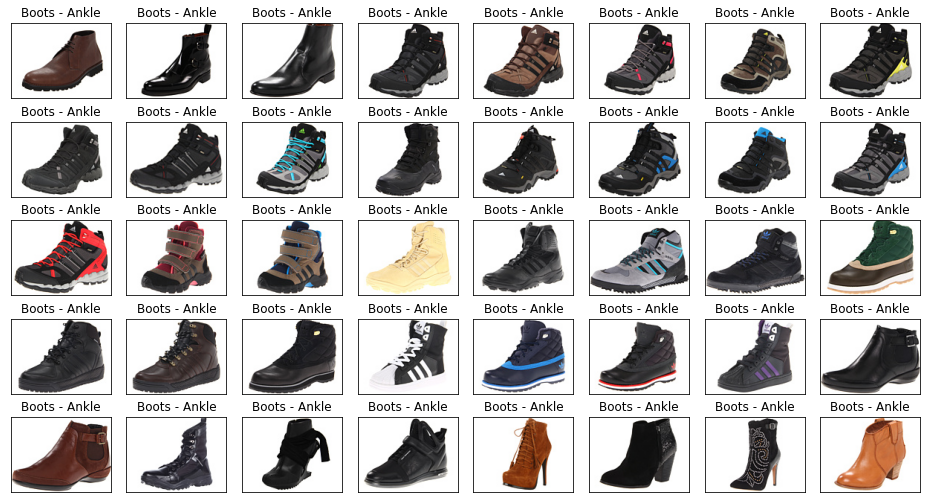

In [ ]:
f,a = plt.subplots(nrows=5, ncols=8,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(img_df2.File_path[i]))
    ax.set_title(img_df2.label1[i])
    
plt.tight_layout()
plt.show()

In [ ]:
img_df2['label1'].value_counts(ascending = True)

Boots - Prewalker Boots                    2
Slippers - Slipper Heels                  10
Slippers - Boot                           14
Sandals - Athletic                        14
Shoes - Crib Shoes                        23
Boots - Over the Knee                     49
Sandals - Heel                           126
Shoes - Prewalker                        249
Shoes - Firstwalker                      369
Shoes - Boat Shoes                       629
Slippers - Slipper Flats                1259
Shoes - Clogs and Mules                 1427
Shoes - Oxfords                         2044
Boots - Knee High                       2202
Shoes - Loafers                         2875
Shoes - Flats                           3994
Boots - Mid-Calf                        4724
Sandals - Flat                          5601
Shoes - Heels                           5703
Boots - Ankle                           5855
Shoes - Sneakers and Athletic Shoes    12856
Name: label1, dtype: int64

In [ ]:
img_df2 = img_df2.groupby('label1').filter(lambda x: len(x)>=100)

In [ ]:
img_df2['label1'].value_counts(ascending = True)

Sandals - Heel                           126
Shoes - Prewalker                        249
Shoes - Firstwalker                      369
Shoes - Boat Shoes                       629
Slippers - Slipper Flats                1259
Shoes - Clogs and Mules                 1427
Shoes - Oxfords                         2044
Boots - Knee High                       2202
Shoes - Loafers                         2875
Shoes - Flats                           3994
Boots - Mid-Calf                        4724
Sandals - Flat                          5601
Shoes - Heels                           5703
Boots - Ankle                           5855
Shoes - Sneakers and Athletic Shoes    12856
Name: label1, dtype: int64

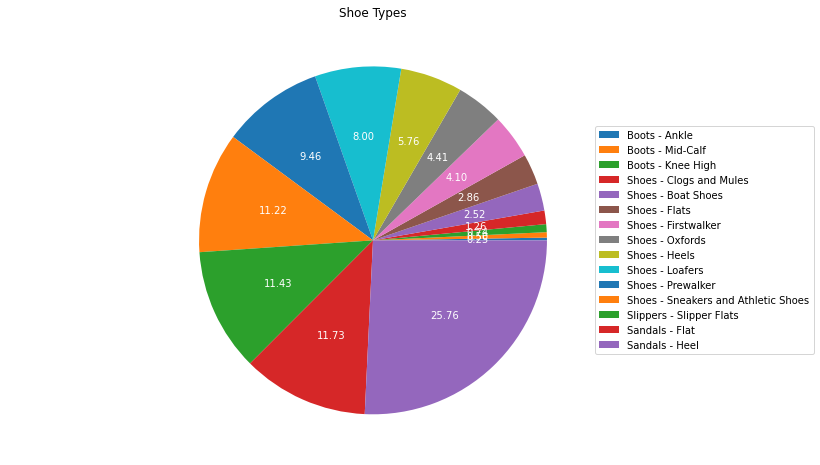

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(img_df2['label1'].value_counts(ascending=True), labels=img_df2['label1'].unique(),autopct='%1.2f',textprops=dict(color="w"))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Shoe Types")
plt.show()

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15


x_train, x_test = train_test_split(img_df2, test_size=1 - train_ratio, stratify=img_df2['label1'])
x_val, x_test = train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=x_test['label1']) 

print(f'Shape of Training Data : ',x_train.shape)
print(f'Shape of Testing Data : ',x_test.shape)
print(f'Shape of Validation Data : ',x_val.shape)
x_test = x_test.copy()

Shape of Training Data :  (34939, 2)
Shape of Testing Data :  (7487, 2)
Shape of Validation Data :  (7487, 2)


In [ ]:
ImgDataGen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)
img_size = (224, 224)

x_train = ImgDataGen.flow_from_dataframe(dataframe = x_train, x_col = 'File_path', y_col = 'label1', target_size = img_size, color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, seed = 42)
x_test= ImgDataGen.flow_from_dataframe(dataframe = x_test, x_col = 'File_path', y_col = 'label1', target_size = img_size, color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, seed = 42)
x_val = ImgDataGen.flow_from_dataframe(dataframe = x_val, x_col = 'File_path', y_col = 'label1', target_size = img_size, color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, seed = 42)

Found 34939 validated image filenames belonging to 15 classes.
Found 7487 validated image filenames belonging to 15 classes.
Found 7487 validated image filenames belonging to 15 classes.


In [ ]:
model = keras.Sequential([
                          tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = [224, 224, 3]),
                          tf.keras.layers.MaxPool2D(),

                          tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [224, 224, 3]),
                          tf.keras.layers.MaxPool2D(),

                          tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [224, 224, 3]),
                          tf.keras.layers.MaxPool2D(),

                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(740, activation = 'relu'),
                          tf.keras.layers.Dense(15, activation = 'softmax')
])

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3)
model_fit = model.fit(x_train, validation_data = x_val, epochs = 15, callbacks = callback)

Epoch 1/15
 867/1092 [======================>.......] - ETA: 47:13 - loss: 0.0933 - accuracy: 0.7426

In [ ]:
test_accuracy = model.evaluate(x_test)[1]*100
print(test_accuracy)